In [1]:
%matplotlib inline
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import sys
from ipywidgets import interact
sys.path.append("../")
from utils.metadata import *

In [2]:
IMG_DIR = '../raw_data/body_sept'
DOCS_DIR = '../docs/exp2/'
OUTPUT_DIR = '../datasets/body_sept'

In [3]:
meta = Metadata()

#meta.read_data_metadata("../raw_data/dataset1/metadata", key="raw_data_meta")

In [4]:
meta.metadata

{}

In [5]:
def get_frame_id(fname):
    return fname.split("-")[1]

def get_track_id(fname):
    return fname.split("-")[2].split(".")[0]

def get_name(fname):
    return fname.split('/')[-1]

In [6]:
os.path.join(IMG_DIR, "*.jpg")

'../raw_data/body_sept/*.jpg'

In [7]:
images = io.imread_collection(os.path.join(IMG_DIR, "*.jpg"))

In [8]:
files = images.files
images_size = len(files)

In [9]:
images_np = np.array(images)

images_size = images_np.shape[0]

In [11]:
def show_images(x):
    #print(files[x])
    print(files[x])
    #im = io.imread(files[x])
    plt.imshow(images_np[x])
    plt.show()

#sorted(files)
interact(show_images, x=(0, images_size-1, 1))

interactive(children=(IntSlider(value=93523, description='x', max=187046), Output()), _dom_classes=('widget-in…

<function __main__.show_images>

## Count Bees By Frames

In [12]:
bees_count_by_frame = dict()
for fname in images.files:
    frame = get_frame_id(fname)
    if frame in bees_count_by_frame:
        bees_count_by_frame[frame] += 1
    else:
        bees_count_by_frame[frame] = 1

In [13]:
frames_bee_count = list()
for key, val in bees_count_by_frame.items():
#     print(key, val)
    frames_bee_count.append(val)
frames_bee_count = np.array(frames_bee_count)

In [14]:
# sorted(bees_count_by_frame.keys())

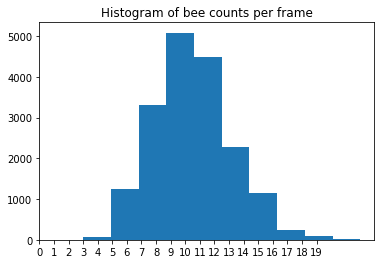

In [15]:
plt.hist(frames_bee_count, bins=10)
plt.xticks(np.arange(20));
plt.title("Histogram of bee counts per frame");
plt.savefig(os.path.join(DOCS_DIR, "histogram_of_bee_counts_per_frame.png"))

## Count Bees by Tracks

In [16]:
bees_count_by_track = dict()
for fname in images.files:
    track = get_track_id(fname)
    if track in bees_count_by_track:
        bees_count_by_track[track] += 1
    else:
        bees_count_by_track[track] = 1

In [17]:
tracks_bee_count = list()
for key, val in bees_count_by_track.items():
#     print(key, val)
    tracks_bee_count.append(val)
tracks_bee_count = np.array(tracks_bee_count)

In [18]:
# sorted(bees_count_by_track.keys())

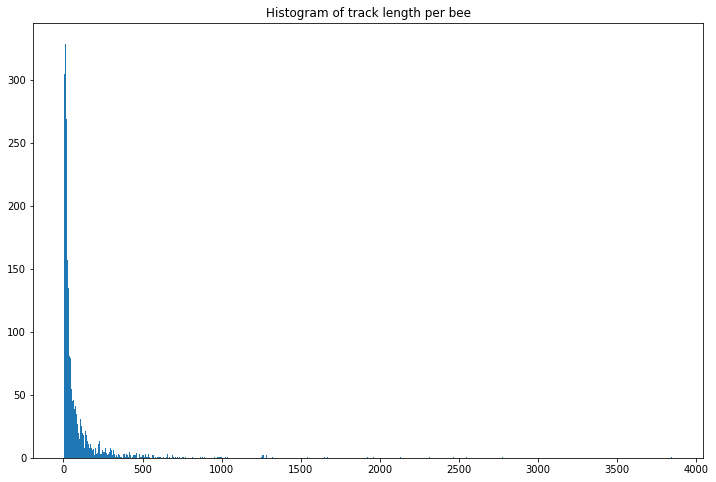

In [19]:
plt.figure(figsize=(12, 8))
plt.hist(tracks_bee_count, bins=600);
#plt.xticks(np.arange(0, 700, 50));
plt.title("Histogram of track length per bee");
plt.savefig(os.path.join(DOCS_DIR, "histogram_of_track_length_per_bee.png"))

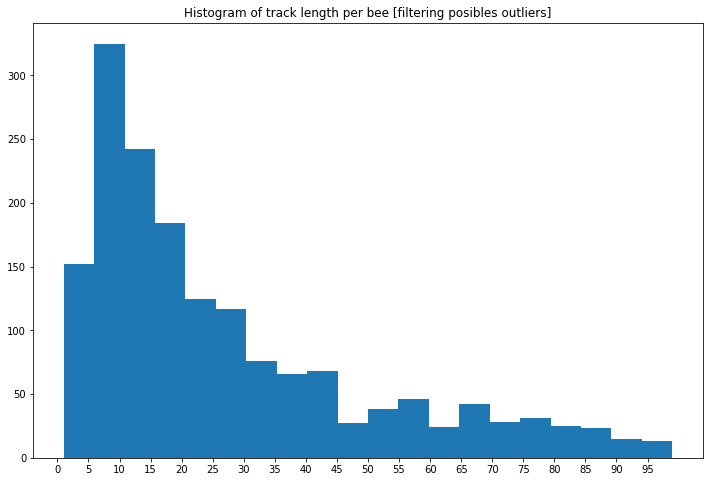

In [20]:
plt.figure(figsize=(12, 8))
plt.hist(tracks_bee_count[tracks_bee_count < 100], bins=20);
plt.xticks(np.arange(0, 100, 5));
plt.title("Histogram of track length per bee [filtering posibles outliers]");
plt.savefig(os.path.join(DOCS_DIR, "histogram_of_track_length_per_bee_filtered.png"))

In [21]:
images_size = len(images.files)
images_size

187047

In [22]:
train_size = int(images_size * .8)
train_size

149637

In [23]:
test_size = int(images_size * .2)
test_size

37409

In [24]:
test_size + train_size

187046

## Store Train data by frame

In [26]:
train_data_path = os.path.join(OUTPUT_DIR, 'train_data')
train_frame_data_path = os.path.join(OUTPUT_DIR, 'train_data', 'frame')
train_track_data_path = os.path.join(OUTPUT_DIR, 'train_data', 'track')

test_data_path = os.path.join(OUTPUT_DIR, 'test_data')
test_frame_data_path = os.path.join(OUTPUT_DIR, 'test_data', 'frame')
test_track_data_path = os.path.join(OUTPUT_DIR, 'test_data', 'track')

if not os.path.isdir(OUTPUT_DIR):
    os.mkdir(OUTPUT_DIR)


if not os.path.isdir(train_data_path):
    os.mkdir(train_data_path)
if not os.path.isdir(train_frame_data_path):
    os.mkdir(train_frame_data_path)
if not os.path.isdir(train_track_data_path):
    os.mkdir(train_track_data_path)

if not os.path.isdir(test_data_path):
    os.mkdir(test_data_path)
if not os.path.isdir(test_frame_data_path):
    os.mkdir(test_frame_data_path)
if not os.path.isdir(test_track_data_path):
    os.mkdir(test_track_data_path)


In [27]:
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    
    if int(frame) > 10000:
        continue
    
    frame_path = os.path.join(train_frame_data_path , frame)
    filepath = os.path.join(frame_path, get_name(fname))
    if os.path.isdir(frame_path):
        io.imsave(filepath, img)
    else:
        os.mkdir(frame_path)
        io.imsave(filepath, img)
       

In [28]:
train_frame_info = "Train data frames was created by taking the first 600 frames"

## Store Train data by track

In [29]:
TRACK_COUNTS = 0
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    track = get_track_id(fname)

    if int(frame) > 10000:
        continue
    
    track_path = os.path.join(train_track_data_path , track)
    filepath = os.path.join(track_path, get_name(fname))
    
    
    if os.path.isdir(track_path):
        if len(os.listdir(track_path)) > 25:
            continue
        io.imsave(filepath, img)
    else:
        os.mkdir(track_path)
        TRACK_COUNTS += 1
        print(track_path)
        io.imsave(filepath, img)
       

../datasets/body_sept/train_data/track/000001
../datasets/body_sept/train_data/track/000002
../datasets/body_sept/train_data/track/000003
../datasets/body_sept/train_data/track/000004
../datasets/body_sept/train_data/track/000005
../datasets/body_sept/train_data/track/000006
../datasets/body_sept/train_data/track/000007
../datasets/body_sept/train_data/track/000008
../datasets/body_sept/train_data/track/000010
../datasets/body_sept/train_data/track/000013
../datasets/body_sept/train_data/track/000014
../datasets/body_sept/train_data/track/000016
../datasets/body_sept/train_data/track/000015
../datasets/body_sept/train_data/track/000020
../datasets/body_sept/train_data/track/000000
../datasets/body_sept/train_data/track/000025
../datasets/body_sept/train_data/track/000027
../datasets/body_sept/train_data/track/000030
../datasets/body_sept/train_data/track/000034
../datasets/body_sept/train_data/track/000035
../datasets/body_sept/train_data/track/000036
../datasets/body_sept/train_data/t

In [ ]:
train_tracks_info = "Train data tracks was created by taking the tracks in the first 600 frames, but each track need to be more than 25 frames long."
train_tracks_count = TRACK_COUNTS

## Store Test data by frame

In [ ]:
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    
    if int(frame) < 16000:
        continue
    
    frame_path = os.path.join(test_frame_data_path , frame)
    filepath = os.path.join(frame_path, get_name(fname))
    if os.path.isdir(frame_path):
        io.imsave(filepath, img)
    else:
        os.mkdir(frame_path)
        io.imsave(filepath, img)
       

In [ ]:
test_frame_info = "Test data frames was created by taking the frames after the first 800"

## Store Test data by track

In [ ]:
TRACK_COUNTS_T = 0
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    track = get_track_id(fname)
    
    if int(frame) < 16000:
        continue
    
    track_path = os.path.join(test_track_data_path , track)
    filepath = os.path.join(track_path, get_name(fname))
    
    
    if os.path.isdir(track_path):
        if len(os.listdir(track_path)) > 25:
            continue
        io.imsave(filepath, img)
    else:
        os.mkdir(track_path)
        TRACK_COUNTS_T += 1
        io.imsave(filepath, img)
       

In [ ]:
test_tracks_info = "Test data tracks was created by taking the tracks after the first 800 frames, but each track need to be more than 25 frames long."
test_tracks_count = TRACK_COUNTS_T

In [ ]:
meta.add_metadata("dataset_meta", { 
        "info" :  {
            "train_frames" : train_frame_info,
            "train_tracks" : train_tracks_info,
            "train_track_count" : train_tracks_count,
            "test_frames" : test_frame_info,
            "test_tracks" : test_tracks_info,
            "test_track_count" : test_tracks_count,
        }
    })

In [ ]:
meta.metadata

In [ ]:
meta.save(os.path.join(OUTPUT_DIR, "metadata"))